# ( JHU CSSE COVID-19 Data Analysis )

> https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data

## by ( Ziad hany ) 
## Preliminary Wrangling
> Table of contents (JHU CSSE COVID-19 Dataset)
-   Daily reports (csse_covid_19_daily_reports) --> df variable
-   USA daily state reports (csse_covid_19_daily_reports_us)  --> df1 variable
-   Time series summary (csse_covid_19_time_series)  --> confirmed_global , deaths_global , confirmed_global, deaths_US , confirmed_US 
-   Data modification records
-   UID Lookup Table Logic


In [23]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import glob
%matplotlib inline

> Load Daily reports (csse_covid_19_daily_reports) 

In [24]:
import datetime
all_filenames = []
filenames = []
file = []
start = datetime.datetime.strptime("22-01-2020", "%d-%m-%Y")
end = datetime.datetime.strptime("25-09-2020", "%d-%m-%Y")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    file.append(date.strftime("%m-%d-%Y"))
    all_filenames.append(date.strftime("%m-%d-%Y")+'.csv')
    
for i in all_filenames :
    filenames.append('csse_covid_19_data/csse_covid_19_daily_reports/' + i )

In [25]:
#all_filenames = [i for i in glob.glob('csse_covid_19_data/csse_covid_19_daily_reports/*.csv')]
df = pd.DataFrame()
for f in filenames:
    df_loop = pd.read_csv(f)
    df = df.append(df_loop, sort=False)

In [26]:
df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 681780 entries, 0 to 3954
Data columns (total 19 columns):
Province/State         4358 non-null object
Country/Region         7617 non-null object
Last Update            7617 non-null object
Confirmed              681761 non-null float64
Deaths                 681339 non-null float64
Recovered              681392 non-null float64
Latitude               4799 non-null float64
Longitude              4799 non-null float64
FIPS                   572716 non-null float64
Admin2                 573839 non-null object
Province_State         641901 non-null object
Country_Region         674163 non-null object
Last_Update            674163 non-null object
Lat                    661381 non-null float64
Long_                  661381 non-null float64
Active                 673922 non-null float64
Combined_Key           674163 non-null object
Incidence_Rate         450187 non-null float64
Case-Fatality_Ratio    453125 non-null float64
dtypes: float64(

> Load Daily reports (csse_covid_19_daily_reports_us) 

In [28]:
import datetime
all_filenames = []
filenames = []
file = []
start = datetime.datetime.strptime("12-04-2020", "%d-%m-%Y")
end = datetime.datetime.strptime("25-09-2020", "%d-%m-%Y")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    file.append(date.strftime("%m-%d-%Y"))
    all_filenames.append(date.strftime("%m-%d-%Y")+'.csv')
    
for i in all_filenames :
    filenames.append('csse_covid_19_data/csse_covid_19_daily_reports_us/' + i )


In [29]:
df1 = pd.DataFrame()
for f in filenames:
    df_loop = pd.read_csv(f)
    df1 = df1.append(df_loop, sort=False)

In [30]:
df1.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3563,93,NaN,3470.0,1.0,75.988020,21583.0,437.0,2.610160,84000001.0,USA,460.300152,12.264945
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264.0,2.0,45.504049,8038.0,31.0,2.941176,84000002.0,USA,1344.711576,11.397059
2,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,3427.0,4.0,48.662422,42109.0,NaN,3.246753,84000004.0,USA,578.522286,NaN
3,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253.0,5.0,49.439423,19722.0,130.0,2.109375,84000005.0,USA,761.753354,10.156250
4,California,US,2020-04-12 23:18:15,36.1162,-119.6816,22795,640,NaN,22155.0,6.0,58.137726,190328.0,5234.0,2.812020,84000006.0,USA,485.423868,22.961176


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9646 entries, 0 to 57
Data columns (total 18 columns):
Province_State          9646 non-null object
Country_Region          9646 non-null object
Last_Update             9627 non-null object
Lat                     9296 non-null float64
Long_                   9296 non-null float64
Confirmed               9646 non-null int64
Deaths                  9646 non-null int64
Recovered               7559 non-null float64
Active                  9629 non-null float64
FIPS                    9627 non-null float64
Incident_Rate           9296 non-null float64
People_Tested           9296 non-null float64
People_Hospitalized     5129 non-null float64
Mortality_Rate          9462 non-null float64
UID                     9646 non-null float64
ISO3                    9646 non-null object
Testing_Rate            9296 non-null float64
Hospitalization_Rate    5129 non-null float64
dtypes: float64(12), int64(2), object(4)
memory usage: 1.4+ MB


In [32]:
confirmed_global = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_global = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_global = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_global = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

deaths_US = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
confirmed_US = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')


## Clean the data 

In [33]:
df['Confirmed'].replace(0,inplace=True)
df['Deaths'].replace(0,inplace=True)
df['Recovered'].replace(0,inplace=True)

### What is the structure of your dataset?


## [Daily reports (csse_covid_19_daily_reports)](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports) ( about 681780 rows  )

This folder contains daily case reports. All timestamps are in UTC (GMT+0).

### File naming convention
MM-DD-YYYY.csv in UTC.

### Field description 
* <b>FIPS</b>: US only. Federal Information Processing Standards code that uniquely identifies counties within the USA.
* <b>Admin2</b>: County name. US only.
* <b>Province_State</b>: Province, state or dependency name.
* <b>Country_Region</b>: Country, region or sovereignty name. The names of locations included on the Website correspond with the official designations used by the U.S. Department of State.
* <b>Last Update</b>: MM/DD/YYYY HH:mm:ss  (24 hour format, in UTC).
* <b>Lat</b> and <b>Long_</b>: Dot locations on the dashboard. All points (except for Australia) shown on the map are based on geographic centroids, and are not representative of a specific address, building or any location at a spatial scale finer than a province/state. Australian dots are located at the centroid of the largest city in each state.
* <b>Confirmed</b>: Counts include confirmed and probable (where reported).
* <b>Deaths</b>: Counts include confirmed and probable (where reported).
* <b>Recovered</b>: Recovered cases are estimates based on local media reports, and state and local reporting when available, and therefore may be substantially lower than the true number.
* <b>Active:</b> Active cases = total cases - total recovered - total deaths.
* <b>Incidence_Rate</b>: Incidence Rate = cases per 100,000 persons.
* <b>Case-Fatality Ratio (%)</b>: Case-Fatality Ratio (%) = Number recorded deaths / Number cases.

---
## [USA daily state reports (csse_covid_19_daily_reports_us)](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports_us) ( about 9646 rows )

This table contains an aggregation of each USA State level data.

### File naming convention
MM-DD-YYYY.csv in UTC.

### Field description
* <b>Province_State</b> - The name of the State within the USA.
* <b>Country_Region</b> - The name of the Country (US).
* <b>Last_Update</b> - The most recent date the file was pushed.
* <b>Lat</b> - Latitude.
* <b>Long_</b> - Longitude.
* <b>Confirmed</b> - Aggregated case count for the state.
* <b>Deaths</b> - Aggregated death toll for the state.
* <b>Recovered</b> - Aggregated Recovered case count for the state.
* <b>Active</b> - Aggregated confirmed cases that have not been resolved (Active cases = total cases - total recovered - total deaths).
* <b>FIPS</b> - Federal Information Processing Standards code that uniquely identifies counties within the USA.
* <b>Incident_Rate</b> - cases per 100,000 persons.
* <b>People_Tested</b> - Total number of people who have been tested.
* <b>People_Hospitalized</b> - Total number of people hospitalized.
* <b>Mortality_Rate</b> - Number recorded deaths * 100/ Number confirmed cases.
* <b>UID</b> - Unique Identifier for each row entry. 
* <b>ISO3</b> - Officialy assigned country code identifiers.
* <b>Testing_Rate</b> - Total test results per 100,000 persons. The "total test results" are equal to "Total test results (Positive + Negative)"
* <b>Hospitalization_Rate</b> - US Hospitalization Rate (%): = Total number hospitalized / Number cases. 
---
## [Time series summary (csse_covid_19_time_series)](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)

See [here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/README.md).

---

### What is/are the main feature(s) of interest in your dataset?

> I think ( Confirmed , Deaths , Active , Recovered, People_Tested  , .. ) is good feature in the dataset

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think Confirmed, Active ,  People_Tested will help understanding the what going on the country and then we could use to predict what we will need . Determine the places of infection and impose quarantine on them .. 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

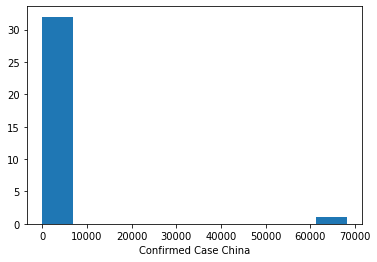

In [34]:
confirmed_china = confirmed_global[confirmed_global['Country/Region'] == 'China']
plt.hist(confirmed_china['9/24/20'])
plt.xlabel('Confirmed Case China');

Usual confirmed case in china every report is from [0:10000] And suddenly it increased dramatically

/home/ziad/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ziad/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/ziad/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/ziad/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


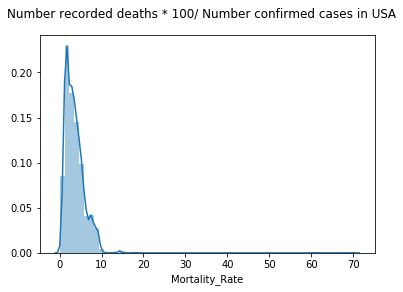

In [35]:
sb.distplot(df1['Mortality_Rate'], bins = 60,  kde=True)
plt.suptitle('Number recorded deaths * 100/ Number confirmed cases in USA')
plt.xlabel('Mortality_Rate');

The Maximum (Mortality_Rate ) about 70 % in some states in usa And the most common Mortality_Rate is  [0 : 10]
it is recovered about 90 % of Cov-19

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> [0 : 10]  I think it common Mortality_Rate all states in USA . 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In Some states in USA the (Mortality_Rate ) reach to  70 % like 'Northern Mariana Islands' i think in this states we should increase the number of tests and the capacity of hospitals To reduce the number of deaths

In [36]:
df1.nlargest(5, 'Mortality_Rate')

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
39,Northern Mariana Islands,US,2020-06-08 03:33:42,15.0979,145.6739,27,19,19.0,-11.0,69.0,48.962716,7241.0,NaN,70.370370,580.0,MNP,13131.075004,NaN
39,Northern Mariana Islands,US,2020-06-04 02:33:23,15.0979,145.6739,24,16,16.0,-8.0,69.0,43.522414,6557.0,NaN,66.666667,580.0,MNP,11890.686203,NaN
39,Northern Mariana Islands,US,2020-06-07 03:53:50,15.0979,145.6739,26,17,16.0,-7.0,69.0,47.149282,6695.0,NaN,65.384615,580.0,MNP,12140.940084,NaN
39,Northern Mariana Islands,US,2020-06-05 02:33:15,15.0979,145.6739,26,16,16.0,-6.0,69.0,47.149282,6695.0,NaN,61.538462,580.0,MNP,12140.940084,NaN
39,Northern Mariana Islands,US,2020-06-06 02:33:09,15.0979,145.6739,26,16,16.0,-6.0,69.0,47.149282,6695.0,NaN,61.538462,580.0,MNP,12140.940084,NaN


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

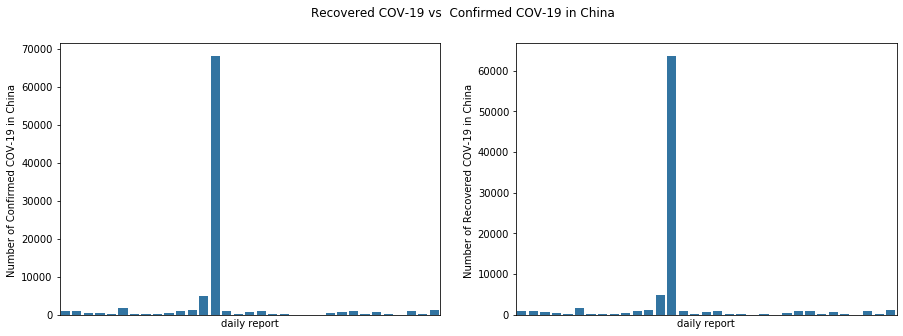

In [37]:
fig, (ax, ax1) = plt.subplots(1,2,figsize=(15, 5))
fig.suptitle('Recovered COV-19 vs  Confirmed COV-19 in China ')


plt.subplot(1, 2, 1)
confirmed_china = confirmed_global[confirmed_global['Country/Region'] == 'China']
base_color = sb.color_palette()[0]
ax = sb.barplot(y=confirmed_china['9/24/20'],x=confirmed_china.index,color= base_color )
ax.set_xlabel('daily report')
ax.set_ylabel('Number of Confirmed COV-19 in China ')
ax.set_xticks([])

plt.subplot(1, 2, 2)
recovered_china = recovered_global[recovered_global['Country/Region'] == 'China']
base_color = sb.color_palette()[0]
ax1 = sb.barplot(y=recovered_china['9/24/20'],x=confirmed_china.index ,color= base_color)
ax1.set_xlabel('daily report')
ax1.set_ylabel('Number of Recovered COV-19 in China ')
ax1.set_xticks([]);


The Number of Confirmed and Recovered case in china increased dramatically in one day and then returned to original status . 

Text(0.5, 0.98, 'Total People_Tested in USA with Province_State')

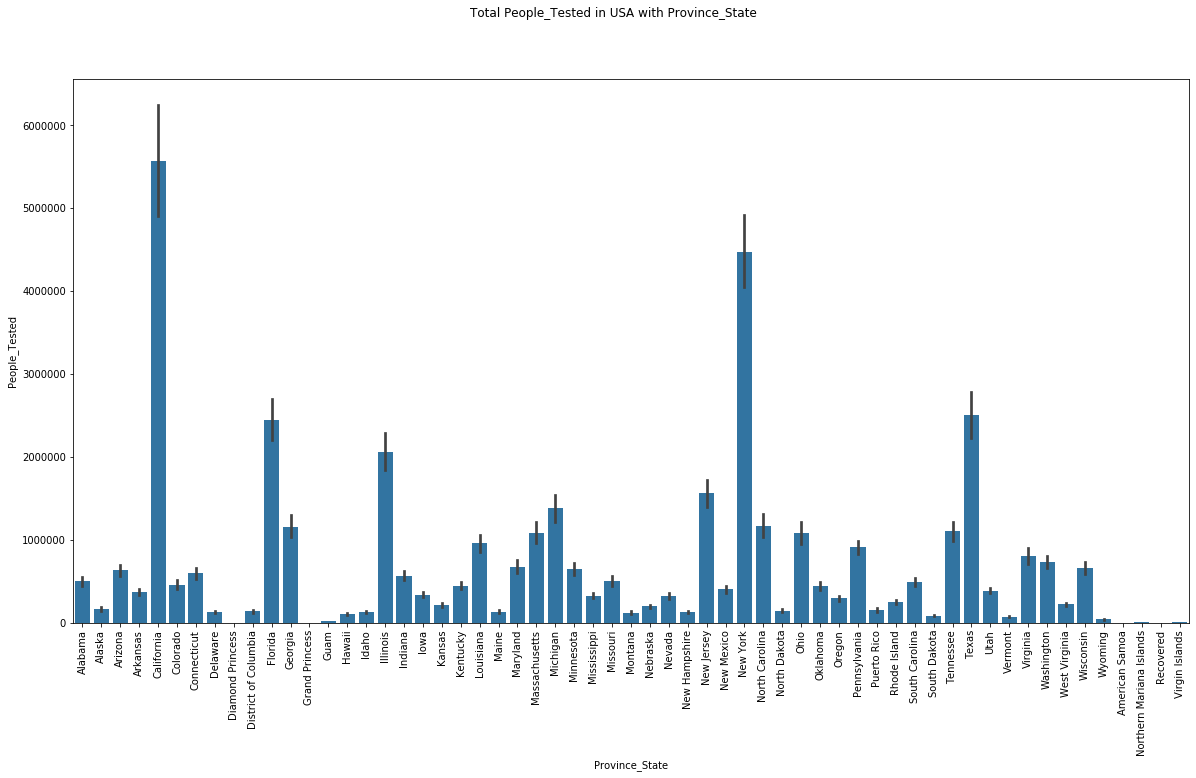

In [38]:
plt.figure(figsize=(20,10))
sb.barplot(data = df1, x = 'Province_State',y = 'People_Tested',color=base_color)
plt.xticks(rotation = 90);
plt.suptitle('Total People_Tested in USA with Province_State')

- ` California , New York , Texas  , Florida   have the biggest  number of people who have been tested . about (600000 test in California ) , (  500000 test in New York ) , ..`


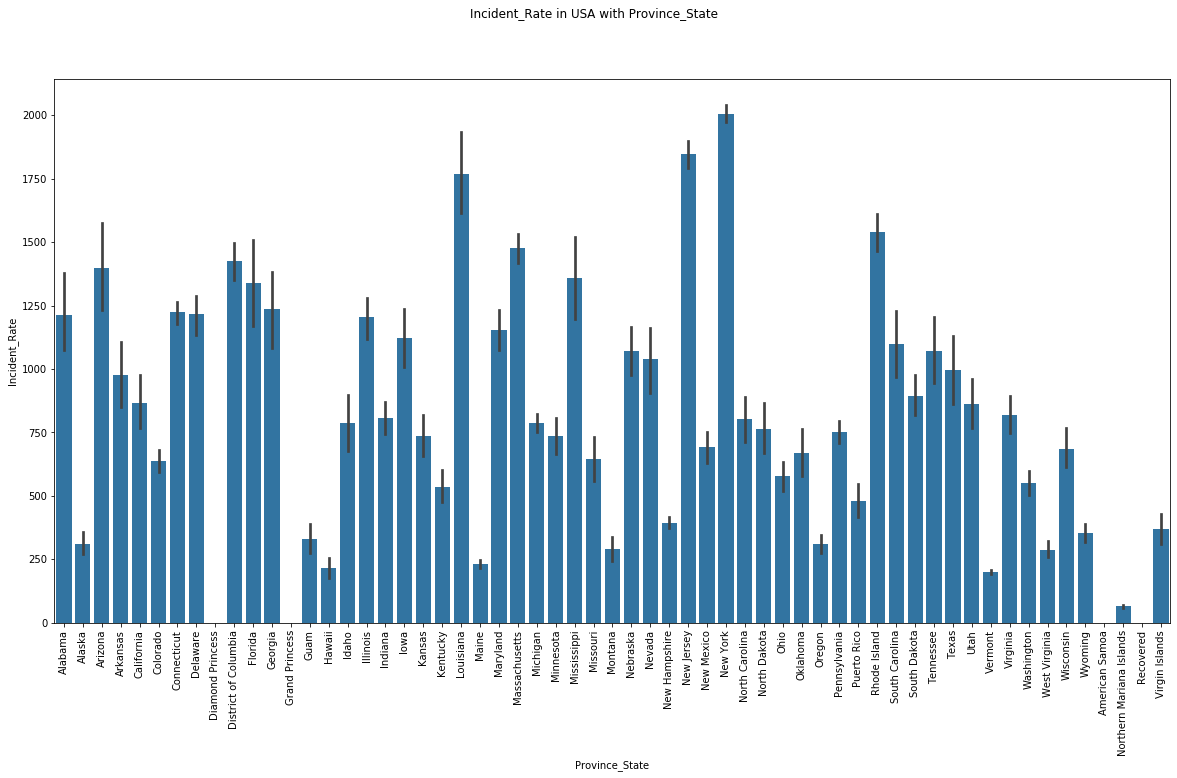

In [39]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(20,10))
sb.barplot(data = df1, x = 'Province_State',y = 'Incident_Rate',color=base_color)
plt.xticks(rotation = 90)
plt.suptitle('Incident_Rate in USA with Province_State');



- `New York  , New jersey , Louisiana  have the biggest Incidence Rate (cases per 100,000 persons.) in USA `

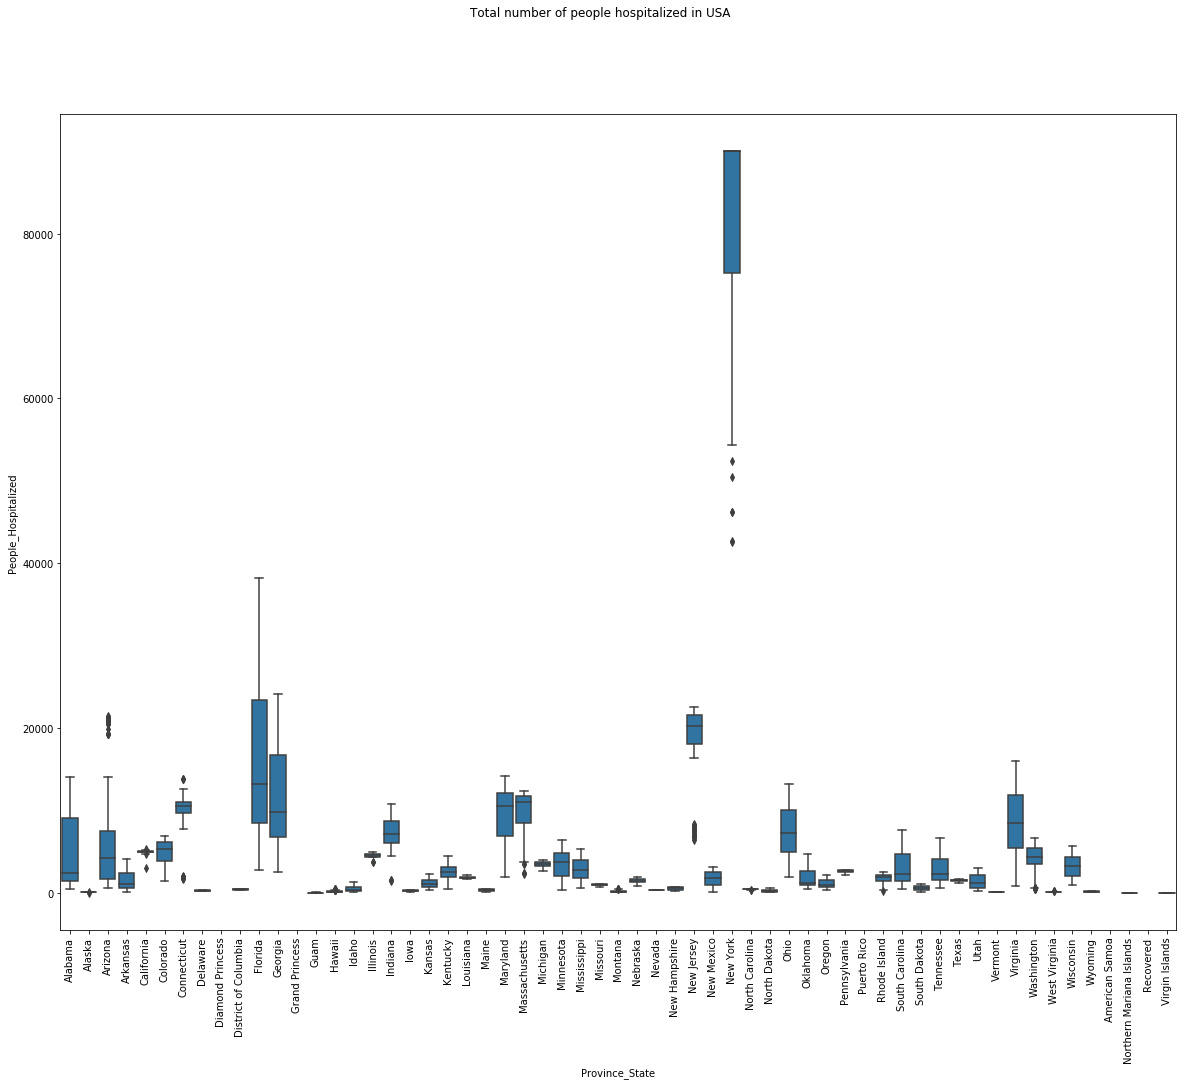

In [40]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(20,15))
sb.boxplot(data = df1, x = 'Province_State', y = 'People_Hospitalized', color=base_color)
plt.suptitle('Total number of people hospitalized in USA')
plt.xticks(rotation = 90);

The  Total number of people hospitalized in ( New york, New jersy , Florida )  are slightly bigger than the other states .

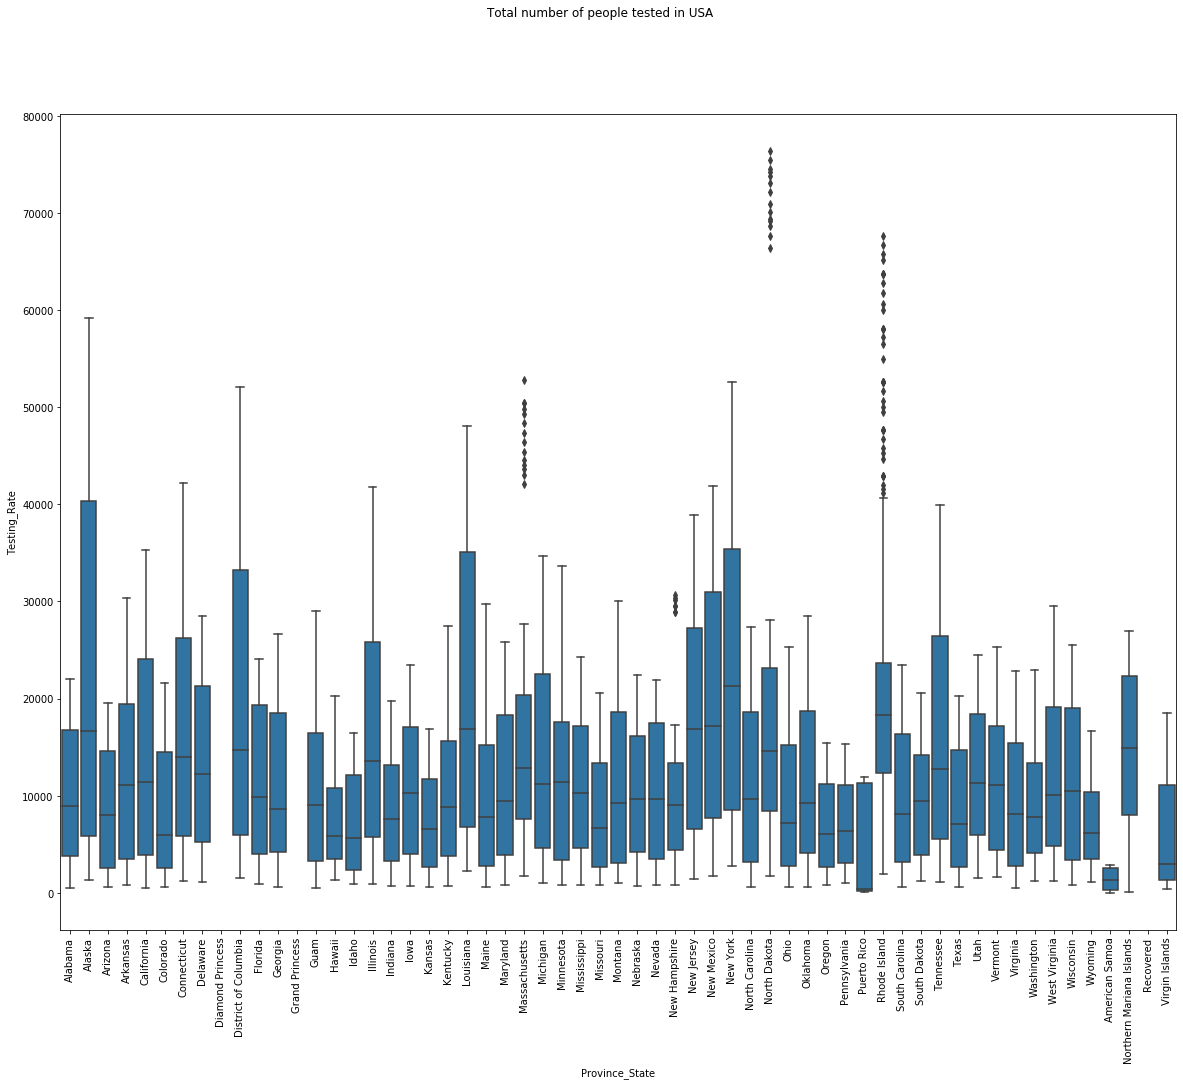

In [41]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(20,15))
sb.boxplot(data = df1, x = 'Province_State', y = 'Testing_Rate', color=base_color)
plt.suptitle('Total number of people tested in USA')
plt.xticks(rotation = 90);

The Total number of  tested people  in ( New york , Alaska , Rhode island  ) are slightly bigger than the other states .

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I observed that New York , New jersey and California have a biggest ( Incident_Rate , Testing_Rate , People_Hospitalized ) . ِAnd some other states Like ( American Samoa , Colorado , .. ) have a low  Testing_Rate 
and Incident_Rate 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I think Confirmed Case have relationship with  Deaths,Recovered,Active  in each states in usa 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

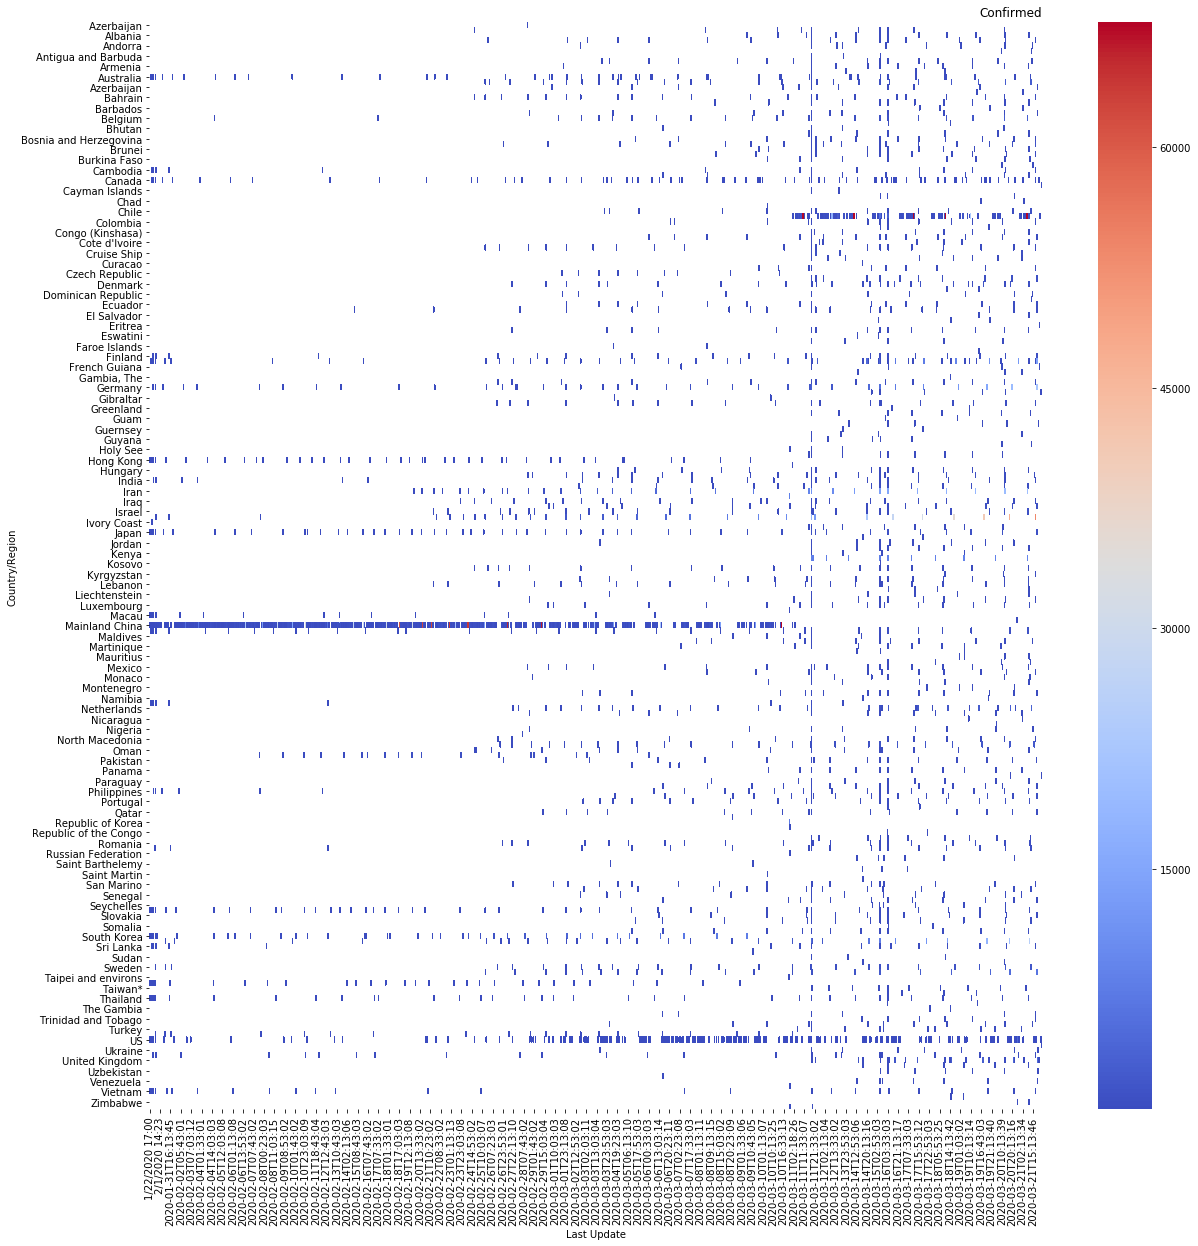

In [42]:
plt.figure(figsize=(20, 20))
heatmap_data = pd.pivot_table(df,values='Confirmed', index=['Country/Region'], columns='Last Update')
sb.heatmap(heatmap_data, cmap="coolwarm");
plt.title('Confirmed', loc='right');

- `The heatmaps shows different between Country and Confirmed case every update . Most country have Confirmed case about [ 0 : 30000] every day . but in some country like China , Chile  Confirmed Cases jumped dramatically [50000 : 60000]`


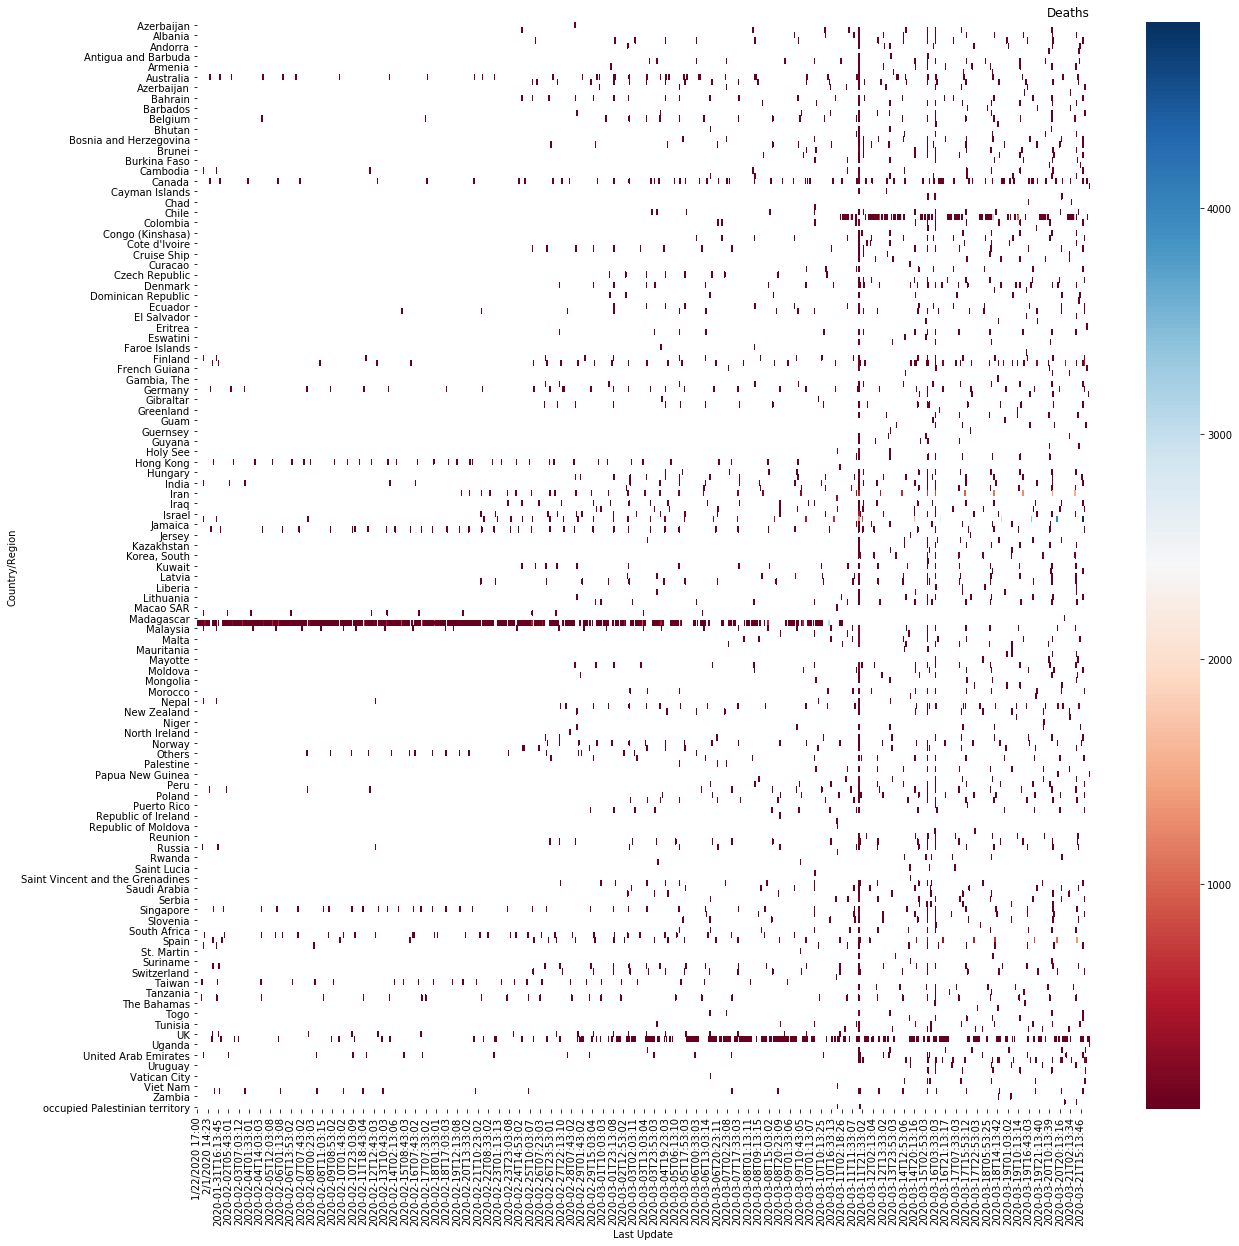

In [43]:
plt.figure(figsize=(20, 20))
heatmap2_data = pd.pivot_table(df,values='Deaths', index=['Country/Region'], columns='Last Update')
heatmap2_data.head(n=5)
sb.heatmap(heatmap2_data, cmap="RdBu");
plt.title('Deaths', loc='right');

- `The heatmaps shows different between Country and Deaths case every update . Most country have Deaths case about [ 0 : 1000] every report . but in some country like Colombia , madagascar  Deaths Cases jumped dramatically [3000:5000] in some reports`

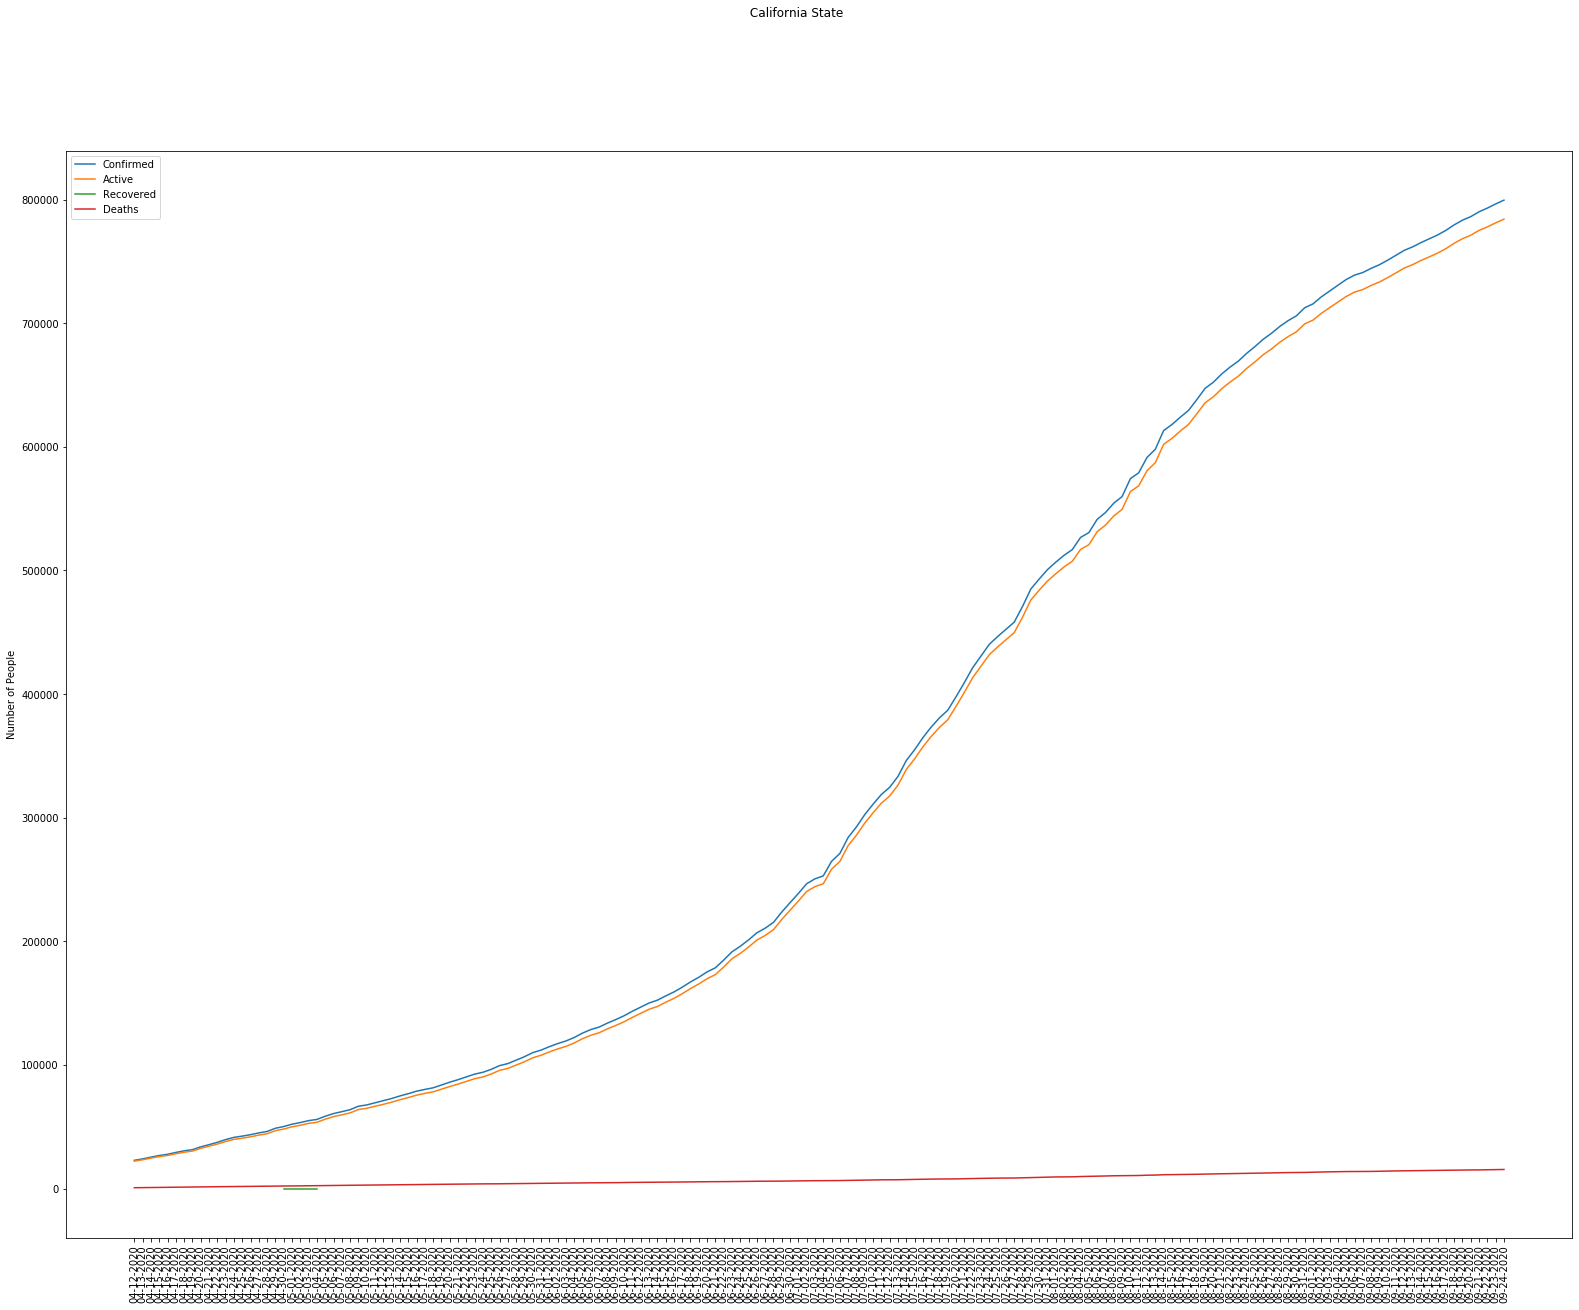

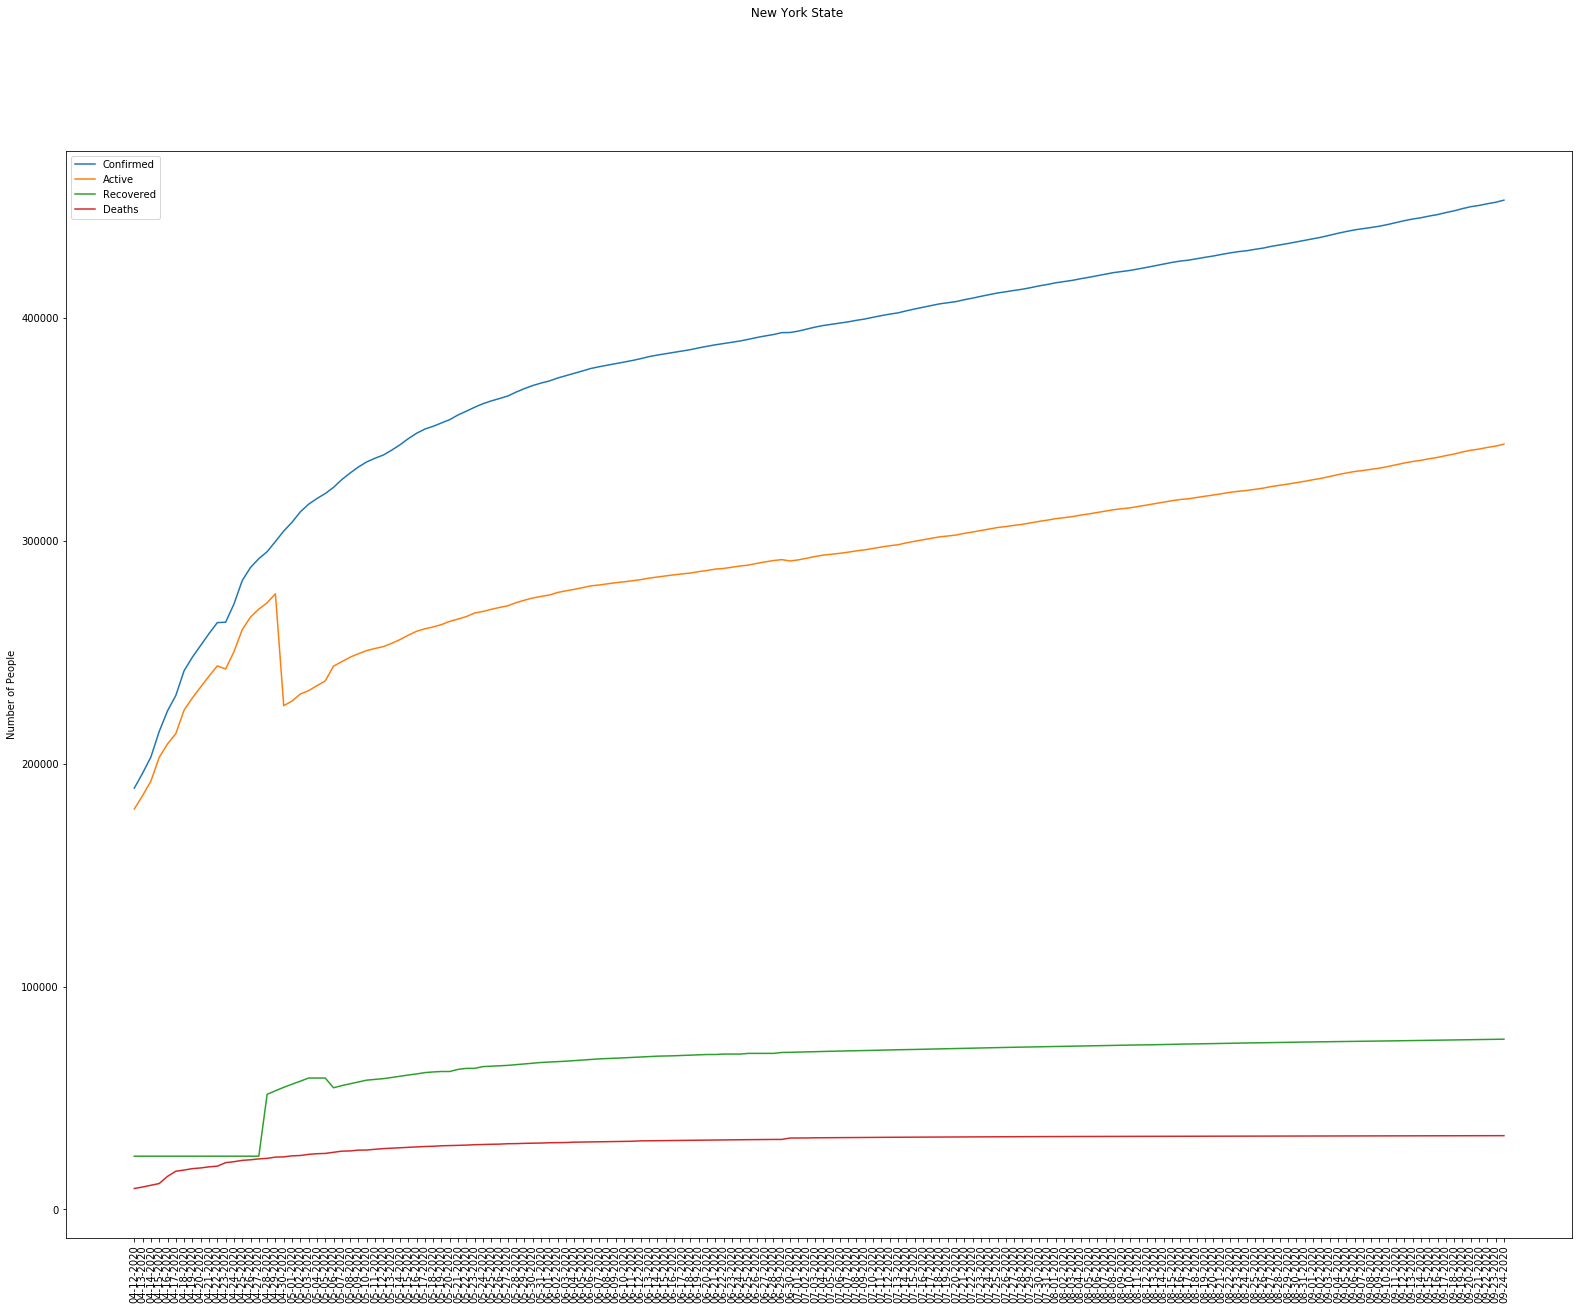

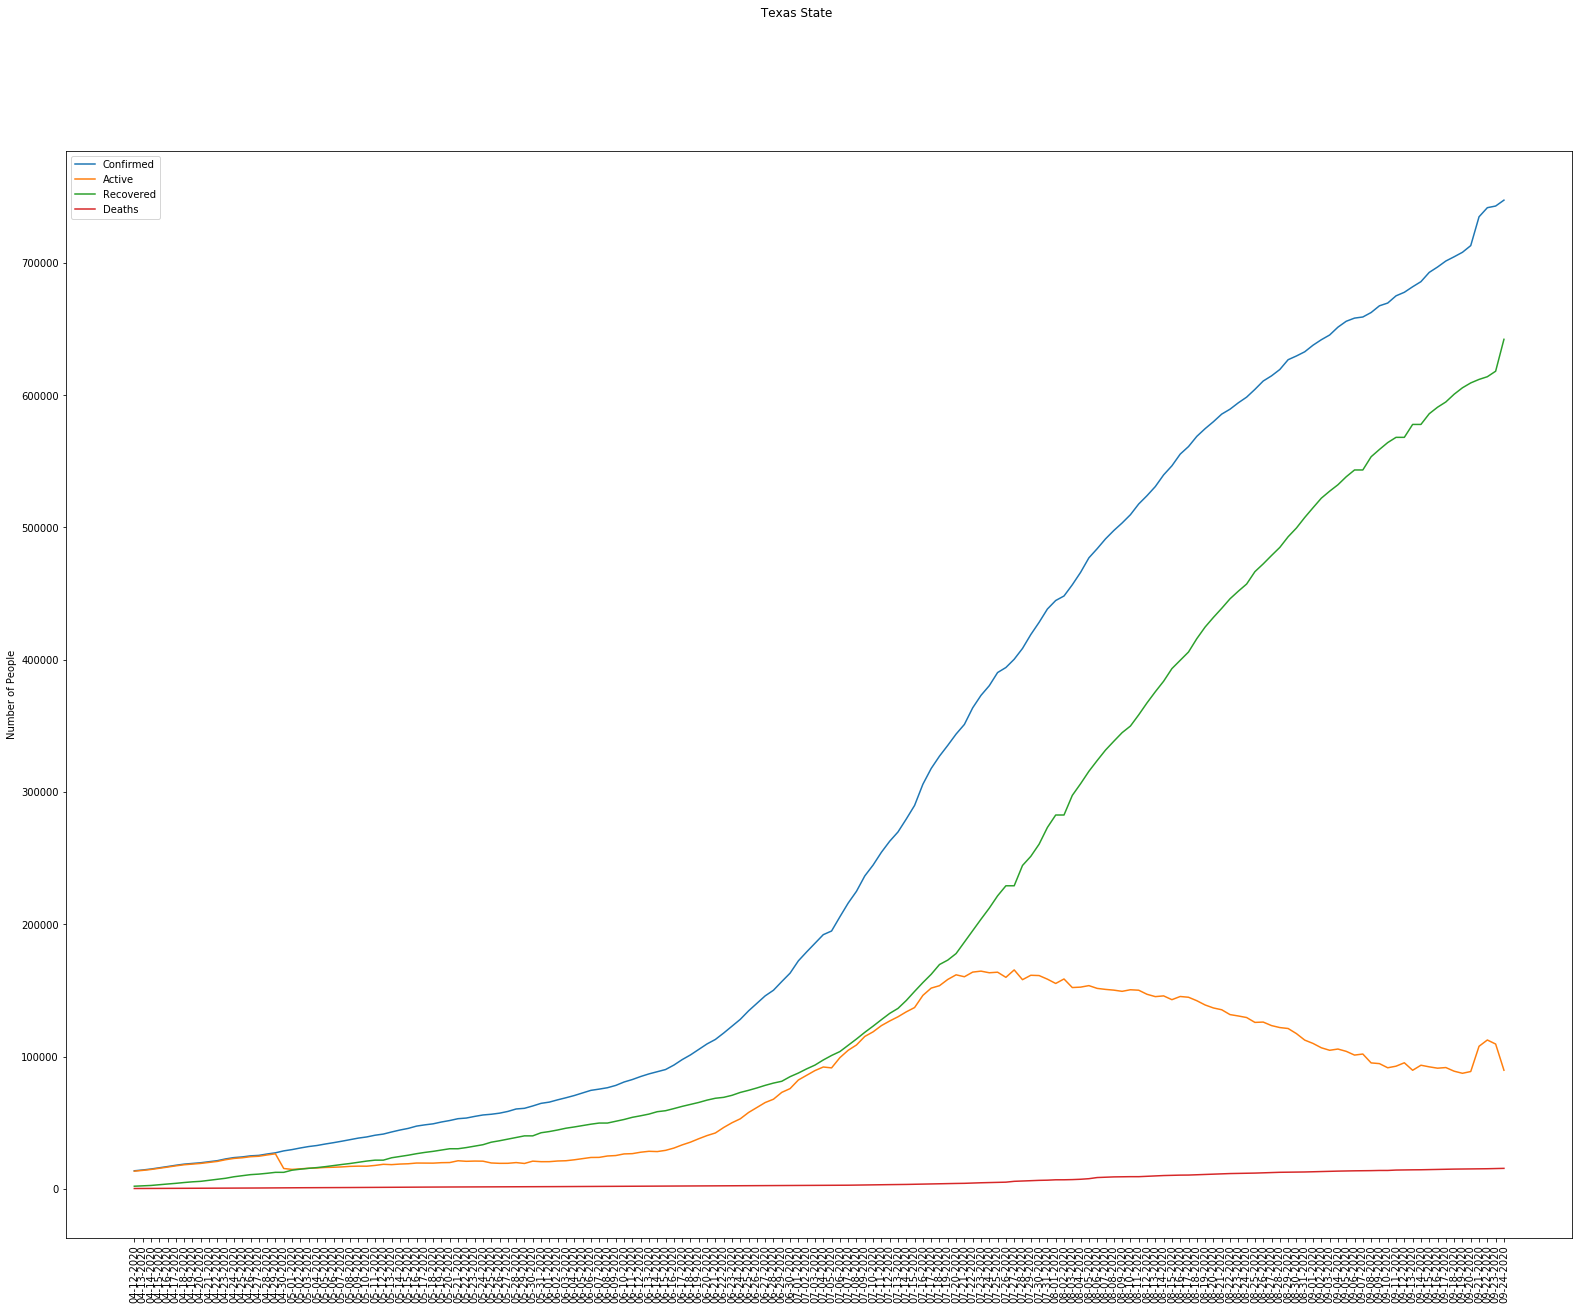

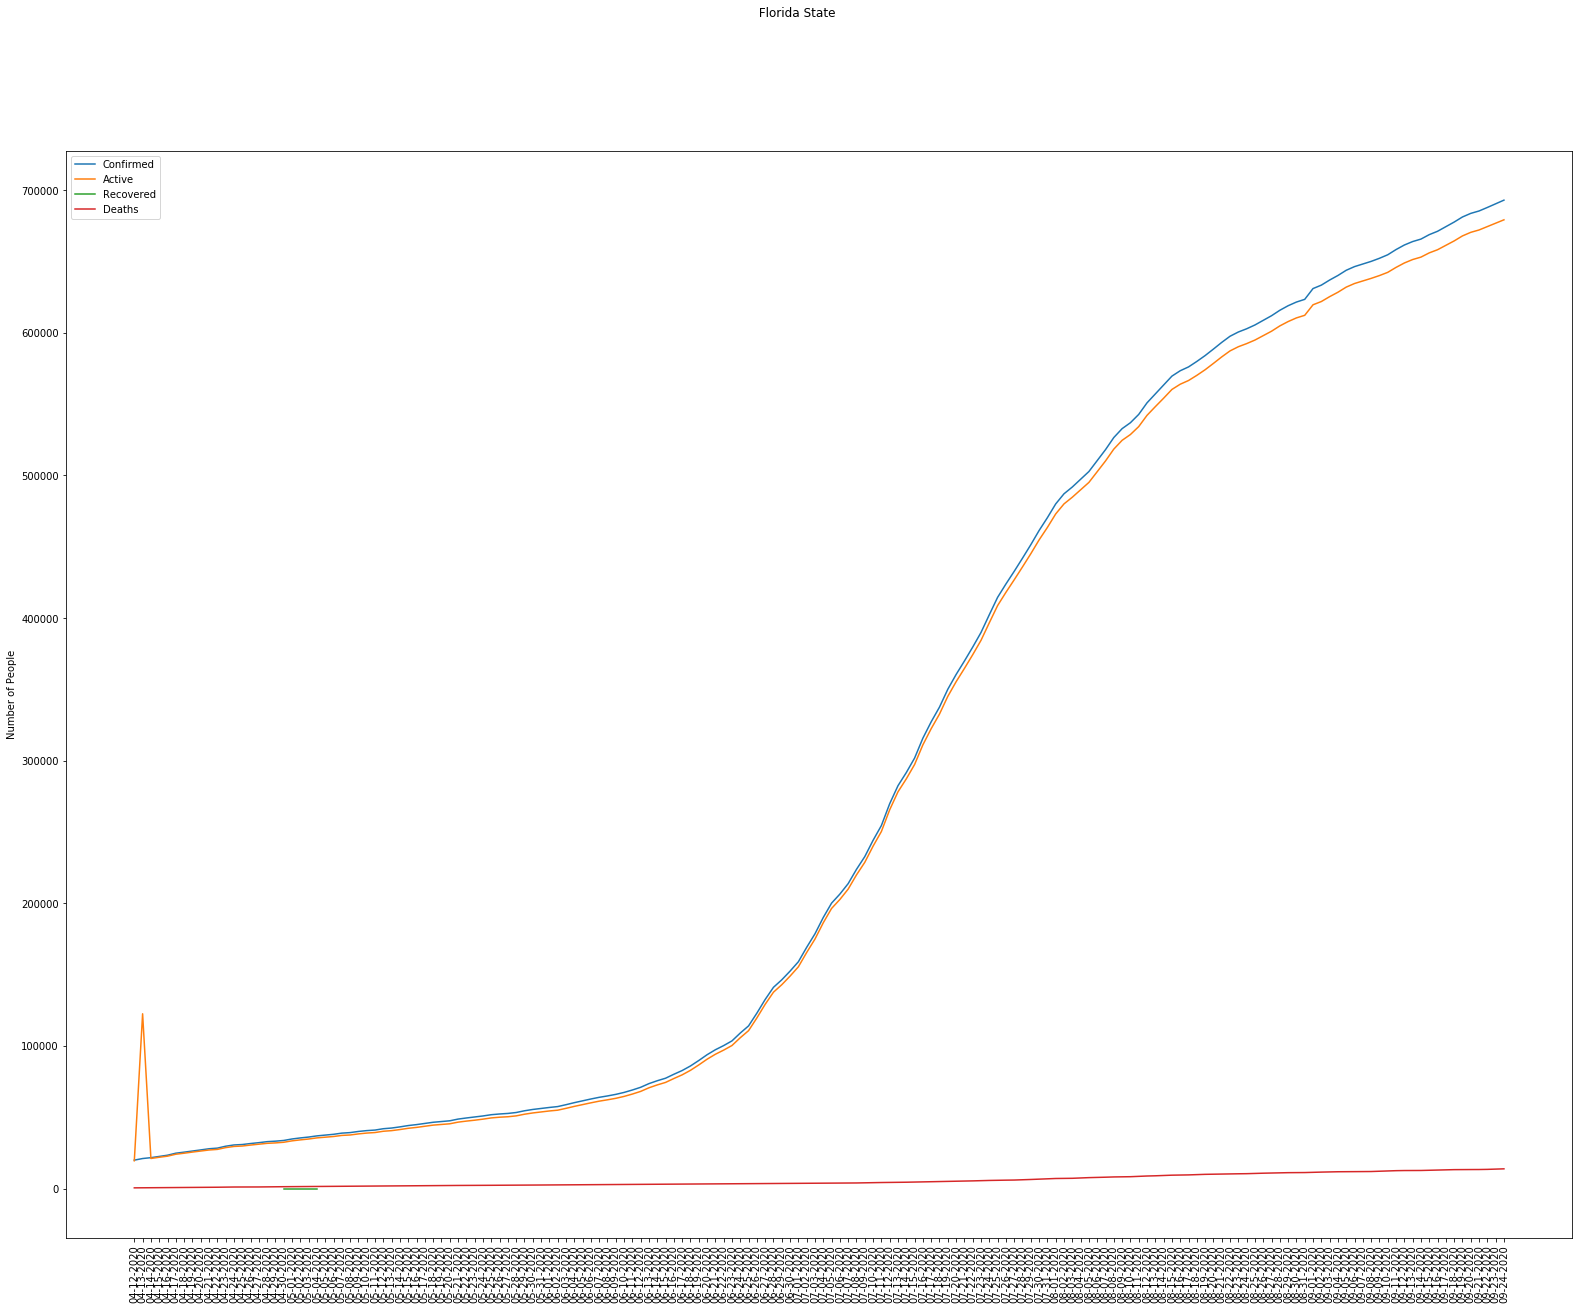

In [44]:
for i in ['California','New York','Texas','Florida']:
    plt.figure(figsize=(27, 20))
    t1 = df1[df1['Province_State'] == i].Confirmed
    t2 = df1[df1['Province_State'] == i].Active
    t3 = df1[df1['Province_State'] == i].Recovered
    t4 = df1[df1['Province_State'] == i].Deaths
    plt.plot(file, t1)
    plt.plot(file, t2)
    plt.plot(file, t3)
    plt.plot(file, t4)
    plt.xticks(rotation = 90);
    plt.suptitle(' {} State'.format(i));
    plt.ylabel('Number of People')
    plt.legend(['Confirmed', 'Active','Recovered','Deaths'], loc='upper left')
    plt.show() # if the time series not clear try to open the image in browser and it will be good 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

####  I observed that Confirmed , Active  increases exponentially  Then it started to be like  a horizontal line
### Were there any interesting or surprising interactions between features?

> Despite the increase in the number of cases, there was a stabilization in mortality and the disease began to decrease in most states of usa 